<a href="https://colab.research.google.com/github/anipatel22/MixingCalcs/blob/main/Mo_MixingCalc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Pakcages**
---
This imports all the necessary packages. User must first go to https://github.com/anipatel22/CosmochemTools.git and download the "data_processor.py" python file onto their computer. Then click the folder icon on the left hand side of the Google Colab window. Upload the data_processor.py file to Colab. Once this is complete, the whole program should run without any errors. *Currently working to avoid this step - i.e. the data_processor.py file gets automatically uploaded once the user runs the program. Update to be made soon.*


In [ ]:
!git clone https://github.com/anipatel22/CosmochemTools.git

fatal: destination path 'CosmochemTools' already exists and is not an empty directory.


In [ ]:
from CosmochemTools import data_processor

ModuleNotFoundError: ignored

In [ ]:
import sys, io, requests
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
from matplotlib import rcParams
from data_processor import *

**DATA PROCESSING** 
---
for Mo Isotopes [94, 95, 96, 97, 98, 100] \\
Converts all relevant data into mass fractions. The relavant data is: terrestrial data (denoted by 'AAS' for Alfa Aesar Standard), the Isua sample (interchangebly refered to as 'observed' or 'measured'), Solar composition (from Lodders 2020), s-process data from Presolar Grain database, s-process data from Arlandini. This section of the codes takes the data from all these sources in their various forms (mu, isotopic ratio, etc...) and converts them all to mass fractions. Then the mass fractions are converted to atomic abudnaces.

Solar

In [ ]:
sol_raw = [0.238, 0.412, 0.433, 0.249, 0.63, 0.253] #mass fracs from lodders 2020

sol_mfrac_ratio = get_iso_ratio(sol_raw, sol_raw[2])
print(sol_mfrac_ratio)

sol_mfrac = get_mfrac(sol_mfrac_ratio)
print(sol_mfrac)

[0.5496535796766744, 0.951501154734411, 1.0, 0.5750577367205543, 1.4549653579676673, 0.5842956120092379]
[0.10744920993227991, 0.18600451467268622, 0.19548532731376975, 0.11241534988713318, 0.28442437923250563, 0.11422121896162528]


Terrestrial (X1)

In [ ]:
AAS = [0.883338, 0.552510, 0.953254, 1.0,	0.573933, 1.453171, 0.581464] #terrestrial standard in isotopic ratio, Mo 92 is included as first entry here becuase it is needed to find the mass fraction of other isotopes.

AAS_mfrac = get_mfrac(AAS)
AAS_mfrac.pop(0) #first entry (Mo 92 mass fraction) is removed from the list because we are only comparing Mo 94 and beyond (since Arlandini s process data does not have Mo 92 included)
print(AAS_mfrac)
X1 = AAS_mfrac

[0.09212077356706852, 0.15893738735208837, 0.16673141403244923, 0.09569266064988569, 0.24228925566094828, 0.09694831492896405]


S-Process (X2)

In [ ]:
# avg_s_raw = [-744.8333333,	-468.3425926, 0.0,	-403.712963,	-195.1309524,	-771.7570093] # average s-process in delta notation taken from presolar grain database
avg_s_raw = [-779.0654206, -747.9277108,	-470.6728972, 0.0,	-404.0560748,	-198.0481928,	-773.411215] # average s-process in delta notation taken from presolar grain database

avg_s_ratio = to_iso_ratio(avg_s_raw, AAS, 'delta')
# print(avg_s_ratio)
avg_s_mfrac = get_mfrac(avg_s_ratio)
avg_s_mfrac.pop(0)
print(avg_s_mfrac)
X2 = avg_s_mfrac

calc_s_raw = [0.00153, .225, 0.450925, .143, .466, .00942] #atomic Abundances from Arlandini
calc_s_ratio = get_iso_ratio(calc_s_raw, 0.450925)
# print(calc_s_ratio)

calc_s_mfrac = get_mfrac(calc_s_ratio)
print(calc_s_mfrac)
X2_modeled = calc_s_mfrac

# x2diff = []

# zip_x2 = zip(X2, X2_calc)
# for i, j in zip_x2:
#   x2diff.append(i-j)

# print(x2diff)
# calc_s_mfrac = [0.001204771841, 0.1771723297, 0.3346588448, 0.1126028583, 0.3669435804, 0.007417614906]

[0.04004183515964681, 0.1450712966979901, 0.28750720001785857, 0.09833662952194977, 0.33505315972313265, 0.03787999974390265]
[0.0011806694318510656, 0.17362785762515673, 0.3479695186649947, 0.11035014951287739, 0.3596025851258802, 0.007269219639239895]


Isua (X_obs)


In [ ]:
isua_mfrac_ratio = [0.883282, 0.552492, 0.953249, 1, 0.573938, 1.453171,	0.581439] #isua data taken from Hope's chemistry analysis
isua_mfrac = get_mfrac(isua_mfrac_ratio)
isua_mfrac.pop(0)
print(isua_mfrac)
X_obs = isua_mfrac
# isua_mu_terr = to_scaled_ratio(isua_mfrac_ratio, AAS, 'mu')
# print(isua_mu_terr)


[0.09211929296043347, 0.1589391772102406, 0.16673416621495601, 0.09569507388907941, 0.24229325505275384, 0.09694574686985781]


Converting to atomic abundances: Here we convert all the mass fractions to atomic abduncaes (# of atoms). This is done by using the equation N = (X*M/Mr) * Avogadro Number. Where N is the number of atoms. X is the mass fraction of the species. M is the total Mass of the combined reservoirs (M1 + M2), and Mr is the molecular or atomic weight of each isotope (in grams). For simplicty we use M = 1 gram. This is done because M appears on either side of the mixing equation (see next section) so it is not the exact atomic abudnance that matters, but rather the relative atomic abudnance (for the purpose of these calculations).

In [ ]:
Mr = [93.905, 94.906, 95.905, 96.906, 97.905, 99.907] #atomic masses of the Mo isotopes
AN = 6.0221409E23
N1 = []
N2 = []
N2_modeled = []
N_obs = []

for i in range(len(X1)):
  N1.append((X1[i]/Mr[i])*AN)

for i in range(len(X2)):
  N2.append((X2[i]/Mr[i])*AN)

for i in range(len(X2_modeled)):
  N2_modeled.append((X2_modeled[i]/Mr[i])*AN)

for i in range(len(X_obs)):
  N_obs.append((X_obs[i]/Mr[i])*AN)

print(N1)
print(N2)
print(N2_modeled)
print(N_obs)

[5.907718207101669e+20, 1.0085172074601754e+21, 1.046952784275738e+21, 5.94673895867642e+20, 1.490322288081664e+21, 5.843798858136017e+20]
[2.5678885386930097e+20, 9.205316726666397e+20, 1.8053374362880212e+21, 6.111046154131644e+20, 2.0609134741258463e+21, 2.283310436203126e+20]
[7.571649725712225e+18, 1.1017337394725656e+21, 2.184997101616994e+21, 6.85761613009116e+20, 2.211917098853271e+21, 4.3817014724243366e+19]
[5.90762325558925e+20, 1.0085285647800326e+21, 1.0469700659928937e+21, 5.946888927372373e+20, 1.4903468883584295e+21, 5.8436440620378725e+20]


**MIXING CALCULATIONS**
---

Here we perform the calculations. Since we have two sets of s-process data (experimental: Presolar Grain, and modeled: Arlandini), we perform the calculations twice with each data set.

Defenition of variables:
*   'isotope' is a string list of the isotopes of interest.
*   'X_obs' is a list with the (Isua) observed mass fraction values that we are trying to recreate.
*   'X1' is a list with mass fraction values of the (AAS) first reservoir we are mixing with 'X2'.
*   'X2' is a list with mass fraction values of the (presolar grain s-process) secondary constituent reservoir we are mixing with 'X1'. 'calc_s_mfrac' are the Arlandini mass fractions.
*   'X_calc' is a list to store the calculated mass fractions. 
*   F is the 'mixing factor' that we are testing. Ex: If F = 0.05, then there is 5% excess of X2 material added to X1, which produces the values in X_calc. We are trying to use an F such that the X_calc values match the X_obs values.
*   'X_diff' the mass fraction difference between calculated and observed
*   'Mr' is a list of atomic masses for the isotopes
*   The correspning 'N' variables (ex. N1, N2, N_calc) are converted to atomic abdundances (number of atoms) from the mass fraction.








In [ ]:
isotope = ['\u03bc$^{94}$Mo', '\u03bc$^{95}$Mo', '\u03bc$^{96}$Mo', '\u03bc$^{97}$Mo', '\u03bc$^{98}$Mo', '\u03bc$^{100}$Mo']

F = 0.00003

N_calc = mix_mfrac(N1, N2, F) #N_calc is calculated with presolar grain s data
print(N_calc)

N_calc2 = mix_mfrac(N1, N2_modeled, F) #calc 2 done with Arelndini calculated values of s.
print(N_calc2)

N_diff = []  #difference between calculated values and observed (isua)
for i in range(len(X_obs)):
  N_diff.append(N_calc[i] - N_obs[i])

N_diff2 = []
for i in range(len(X_obs)):
  N_diff2.append(N_calc2[i] - N_obs[i])

# N_sum = []
# N_sum2 = []

N_diffsq = [i**2 for i in N_diff]
N_diffsq2 = [i**2 for i in N_diff2]

N_sum = sum(N_diffsq)
N_sum2 = sum(N_diffsq2)

print(N_sum)
print(N_sum2)

[5.907618012211617e+20, 1.0085145678941317e+21, 1.0469755358152983e+21, 5.946743887892283e+20, 1.4903394058172453e+21, 5.8436920434833595e+20]
[5.907543247050374e+20, 1.0085200039561358e+21, 1.0469869256052581e+21, 5.946766284991563e+20, 1.490343935925987e+21, 5.8436366892746906e+20]
5.1548182367887464e+32
5.812198672028395e+32


**Conversions**
---

Coverting atomic abduances (calculated and observed) to Mu format.

In [ ]:
N1_ratio = get_iso_ratio(N1,N1[2])

N_obs_ratio = get_iso_ratio(N_obs, N_obs[2])
N_obs_mu = to_scaled_ratio(N_obs_ratio, N1_ratio,'mu')

N_calc_ratio = get_iso_ratio(N_calc,N_calc[2])
N_calc_mu = to_scaled_ratio(N_calc_ratio, N1_ratio, 'mu')

N_calc2_ratio = get_iso_ratio(N_calc2,N_calc2[2])
N_calc2_mu = to_scaled_ratio(N_calc2_ratio, N1_ratio, 'mu')

We can convert our calculated and observed mass fractions to ratios and a scaled standardized form (delta, epsilon, or mu).

In [ ]:
# obs_mu_terr = to_scaled_ratio(isua_mfrac_ratio, AAS, 'mu') #this is the observed (isua sample) mass fractions converted to ppm deviation from terrestrial (mu)
# #  similarly we do the same for calculated below. And alos find the ppm differences between calculated and obserevd

# calc_ratio = get_iso_ratio(X_calc,X_calc[2])
# calc_mu_terr = to_scaled_ratio(calc_ratio, AAS, 'mu')

# calc2_ratio = get_iso_ratio(X_calc2,X_calc2[2])
# calc2_mu_terr = to_scaled_ratio(calc2_ratio, AAS, 'mu')

# print(obs_mu_terr)
# print(calc_mu_terr)
# print(calc2_mu_terr)

# mu_diff = []
# for i in range(len(obs_mu_terr)):
#   mu_diff.append(calc_mu_terr[i] - obs_mu_terr[i])

# mu_diff2 = []
# for i in range(len(obs_mu_terr)):
#   mu_diff2.append(calc2_mu_terr[i] - obs_mu_terr[i])


# print(mu_diff)
# print(mu_diff2)


Converting to atomic abundances:
Here we convert all the mass fractions (observed and calculated from above) to atomic abduncaes (# of atoms). This is done by using the equation N = (X*M/Mr) * Avogadro Number. Where N is the number of atoms. X is the mass fraction of the species. M is the total Mass of the combined reservoirs (M1 + M2), and Mr is the molecular or atomic weight of each isotope (in grams). M appears for each term on either side of the mixing equation used above... that is why we can just perform the conversion to the final calculated mass fraction instead of having to convert each of the constituent mixing components (terrestrial and s-process) to atomic abduances first. Further, for simplicty we use M = 1 gram. This is done because again, M appears on either side of the mixing equation.


In [ ]:
# Mr = [93.905, 94.906, 95.905, 96.906, 97.905, 99.907] #atomic masses of the Mo isotopes
# AN = 6.0221409E23
# N_calc = []
# N_calc2 = []
# for i in range(len(X_calc)):
#   N_calc.append((X_calc[i]/Mr[i])*AN)

# for i in range(len(X_calc2)):
#   N_calc2.append((X_calc2[i]/Mr[i])*AN)

# N_obs =[]
# for i in range(len(X_obs)):
#   N_obs.append((X_obs[i]/Mr[i])*AN)

We can make similar converestions to ppm deviation from terrestrial for atomic abudnances. So instead of using mass fractions to get isotopic ratios (i.e (Mass fraction of Mo-x)/(Mass fraction of Mo-96), we use atomic abdunaces: N(Mo-x)/N(Mo-96) to get isotopic ratios. Then we use these isotopic ratios calculated with atomic abundances in our usual equation (converting to mu) for getting ppm deviation from terrestrial: \\
((iso ratio of calculated/iso ratio of terrestrial standard)-1) *1,000,000

In [ ]:
# N_AAS = []

# for i in range(len(AAS_mfrac)):
#   N_AAS.append((AAS_mfrac[i]/Mr[i])*AN)

# N_AAS_ratio = get_iso_ratio(N_AAS,N_AAS[2])
# # print(N_AAS_ratio)


# N_obs_ratio = get_iso_ratio(N_obs, N_obs[2])
# N_obs_mu = to_scaled_ratio(N_obs_ratio, N_AAS_ratio,'mu')

# # N_obs_mu = to_scaled_ratio(isua_mfrac_ratio, AAS, 'mu')

# N_calc_ratio = get_iso_ratio(N_calc,N_calc[2])
# N_calc_mu = to_scaled_ratio(N_calc_ratio, N_AAS_ratio, 'mu')

# N_calc2_ratio = get_iso_ratio(N_calc2,N_calc2[2])
# N_calc2_mu = to_scaled_ratio(N_calc2_ratio, N_AAS_ratio, 'mu')

# print(N_obs_mu)
# print(N_calc_mu)
# print(N_calc2_mu)

# N_mu_diff = []
# for i in range(len(N_obs_mu)):
#   N_mu_diff.append(N_calc_mu[i] - N_obs_mu[i])

# N_mu_diff2 = []
# for i in range(len(obs_mu_terr)):
#   N_mu_diff2.append(N_calc2_mu[i] - N_obs_mu[i])


# print(N_mu_diff)
# print(N_mu_diff2)

**Error Propagation**
---

variance for Isua and AAS atomic abundnaces


In [ ]:
sd_isua_ratio = [0.000017, 0.000003, 0.0000035, 0.0, 0.000003, 0.0, 0.000005]
var_isua_ratio = [i**2 for i in sd_isua_ratio]

sdAAS_ratio = [0.0000245, 0.0000035, 0.000005, 0.0, 0.000002, 0.0, 0.000005]
varAAS_ratio = [i**2 for i in sdAAS_ratio]

var_isua_mfrac = get_mfrac_var(isua_mfrac_ratio, var_isua_ratio)
var_AAS_mfrac = get_mfrac_var(AAS, varAAS_ratio)

var_isua_mfrac.pop(0)
var_AAS_mfrac.pop(0)

varN_obs = []
for i in range(len(Mr)):
  varN_obs.append((AN/Mr[i])**2 * var_isua_mfrac[i])

varN1 = []
for i in range(len(Mr)):
  varN1.append((AN/Mr[i])**2 * var_AAS_mfrac[i])

variance for s process atomic abudnaces

In [ ]:
sd_s_raw = [30.48148148, 39.52777778, 50.77777778, 0.0, 64.53703704, 61.0462963, 36.31775701]
var_s_raw = [(0.5*i)**2 for i in sd_s_raw]

var_s_ratio = []
for i in range(len(avg_s_raw)):
  if (avg_s_raw[i] != 0.0 and AAS[i] != 0.0):    
    var_s_ratio.append(varAAS_ratio[i] + ((avg_s_raw[i] * AAS[i]/10**6)**2) * (var_s_raw[i]/(avg_s_raw[i])**2 + varAAS_ratio[i]/(AAS[i]**2)))
  else:
    var_s_ratio.append(varAAS_ratio[i])

var_s_mfrac = get_mfrac_var(avg_s_ratio, var_s_ratio)
var_s_mfrac.pop(0)

varN2 = []
for i in range(len(Mr)):
  varN2.append((AN/Mr[i])**2 * var_s_mfrac[i])

variance for mixing calculation

In [ ]:
varN_calc = []
for i in range(len(varN2)):
  varN_calc.append((1-F)**2 * varN1[i] + F**2 * varN2[i])
print(varN_calc)

[2.0470745268979176e+31, 4.682511483328541e+31, 2.0307813928378603e+31, 1.084596452215804e+31, 4.114996092098957e+31, 3.157687457314897e+31]


variance for conversion to mu. final error reported as 2 standard deviations. (1 SD = square root of variance)

In [ ]:
varN1_ratio = get_iso_ratio_var(N1,varN1,2)
varN_obs_ratio = get_iso_ratio_var(N_obs, varN_obs, 2)
varN_obs_mu = to_scaled_ratio_var(N_obs_ratio, varN_obs_ratio, N1_ratio, varN1_ratio, scale='mu')

# print(N_obs_ratio, varN_obs_ratio, N_AAS_ratio, varN_AAS)
varN_calc_ratio = get_iso_ratio_var(N_calc, varN_calc, 2)
varN_calc_mu = to_scaled_ratio_var(N_calc_ratio, varN_calc_ratio, N1_ratio, varN1_ratio, scale='mu')

Er_N_calc = [(i**(1/2))*2 for i in varN_calc_mu]
Er_N_obs = [(i**(1/2))*2 for i in varN_obs_mu]
# print(varN_obs_ratio)
print(Er_N_calc, Er_N_obs)

[24.847957485822317, 22.72676436907915, 17.217348638945257, 19.838531917907442, 17.217216595575728, 29.797740398512005] [22.432288803123562, 19.71690675848634, 14.992937945865064, 19.56159934338043, 14.992937945865064, 28.570679377223424]


ignore below.

In [ ]:
# varN_calc = []
# for i in range(len(Mr)):
#   varN_calc.append((AN/Mr[i])**2 * varX_calc[i])

# varN_obs = []
# for i in range(len(Mr)):
#   varN_obs.append((AN/Mr[i])**2 * var_isua_mfrac[i])


# varN_AAS = []
# for i in range(len(Mr)):
#   varN_AAS.append((AN/Mr[i])**2 * var_AAS_mfrac[i])


# varN_AAS_ratio = get_iso_ratio_var(N_AAS,varN_AAS,2)

# varN_obs_ratio = get_iso_ratio_var(N_obs, varN_obs, 2)
# varN_obs_mu = to_scaled_ratio_var(N_obs_ratio, varN_obs_ratio, N_AAS_ratio, varN_AAS_ratio, scale='mu')
# # print(N_obs_ratio, varN_obs_ratio, N_AAS_ratio, varN_AAS)
# varN_calc_ratio = get_iso_ratio_var(N_calc, varN_calc, 2)
# varN_calc_mu = to_scaled_ratio_var(N_calc_ratio, varN_calc_ratio, N_AAS_ratio, varN_AAS_ratio, scale='mu')

# Er_N_calc = [(i**(1/2))*2 for i in varN_calc_mu]
# Er_N_obs = [(i**(1/2))*2 for i in varN_obs_mu]
# # print(varN_obs_ratio)
# print(Er_N_calc, Er_N_obs)

**Plot (PPM deviation from terrestrial with Atomic Abundances)**
---


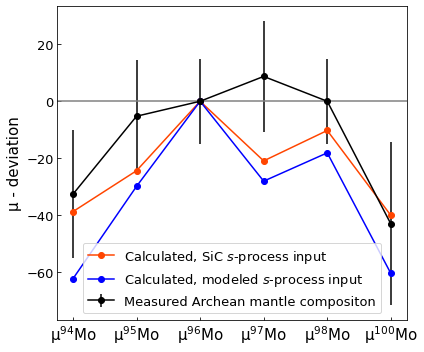

In [ ]:
# plt.rc('font', family='calibri')
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 13)
plt.rc('legend', fontsize= 13) 

fig = plt.figure()
ax = plt.axes() 
# plt.style.use('classic')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
# ax.set_title('Manual y', y=1.1, pad=-14)
# plt.plot(isotope, N_obs_mu, color = 'black', label = 'Isua, Greenland', marker = 'o')
ax.errorbar(isotope, N_obs_mu, yerr= Er_N_obs, fmt='o-', color = 'black', label = 'Measured Archean mantle compositon')
plt.plot(isotope, N_calc_mu, color = 'orangered', label = 'Calculated, SiC $s$-process input', marker = 'o')
plt.plot(isotope, N_calc2_mu, color = 'blue', label = 'Calculated, modeled $s$-process input', marker = 'o')


# ax.errorbar(isotope, N_calc_mu, yerr= Er_N_calc, fmt='o', color = 'orange')

# plt.xlabel('isotope')
plt.ylabel('\u03bc - deviation')
# plt.title('Archean Mantle Molybdenum Composition')
plt.axhline(y = 0, color = 'gray')
leg = plt.legend(loc = 'lower center')
# plt.show()
plt.savefig("Mo.pdf",format='pdf')

**This marks the end of the notebook. The code below may not work and can be ignored. The cells below are just remanants of practice trials and cross checks in previous versions of the notbook**
---

**Plot (PPM deviation from terrestrial with Mass Fracs)**
---



Here we plot observed and calculated, standardized to terrestrial in mu notation.

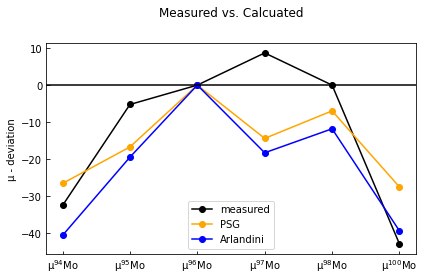

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Manual y', y=1.1, pad=-14)

plt.plot(isotope, obs_mu_terr, color = 'black', marker='o', label = 'measured')
plt.plot(isotope, calc_mu_terr, color = 'orange', marker='o', label = 'PSG')
plt.plot(isotope, calc2_mu_terr, color = 'blue', marker='o', label = 'Arlandini')

# plt.xlabel('isotope')
plt.ylabel('\u03bc - deviation')
plt.title('Measured vs. Calcuated')
plt.axhline(y = 0, color = 'black')
leg = plt.legend()
plt.savefig("Mo.pdf",format='pdf')
plt.show()

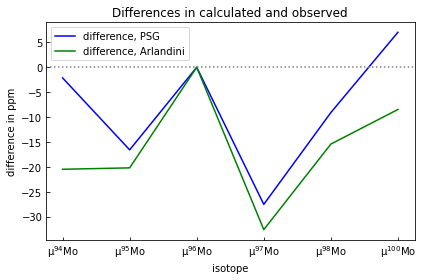

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

plt.plot(isotope, mu_diff, color = 'blue', label = 'difference, PSG')
plt.plot(isotope, mu_diff2, color = 'green', label = 'difference, Arlandini')
plt.xlabel('isotope')
plt.ylabel('difference in ppm')
plt.title('Differences in calculated and observed')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()

With Arlandini values

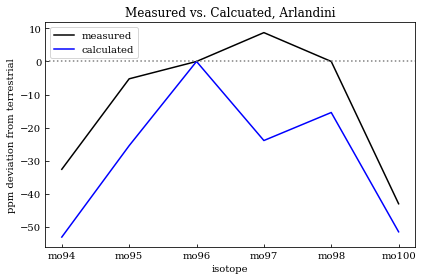

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

plt.plot(isotope, obs_mu_terr, color = 'black', label = 'measured')
plt.plot(isotope, calc2_mu_terr, color = 'blue', label = 'calculated')
plt.xlabel('isotope')
plt.ylabel('ppm deviation from terrestrial')
plt.title('Measured vs. Calcuated, Arlandini')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()

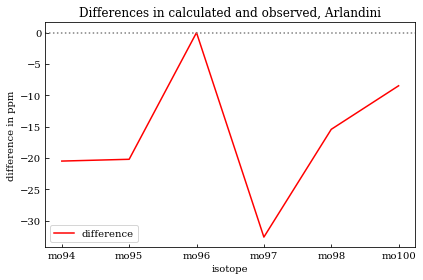

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

plt.plot(isotope, mu_diff2, color = 'red', label = 'difference')
plt.xlabel('isotope')
plt.ylabel('difference in ppm')
plt.title('Differences in calculated and observed, Arlandini')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()

**Plot (Mass Fractions)**
---

Here we plot the mass fractions of observed and calculated. And their differences.

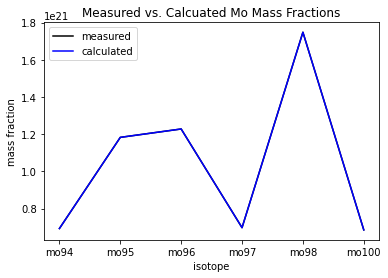

In [ ]:
plt.plot(isotope, N_obs, color = 'black', label = 'measured')
plt.plot(isotope, N_calc, color = 'blue', label = 'calculated')
plt.xlabel('isotope')
plt.ylabel('mass fraction')
plt.title('Measured vs. Calcuated Mo Mass Fractions')
leg = plt.legend()
plt.show()

In [ ]:
plt.plot(isotope, N_diff, color = 'red', label = 'difference (avg s)')
plt.xlabel('isotope')
plt.ylabel('mass fraction difference')
plt.title('Differences in calculated and observed mass fractions')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()

NameError: ignored

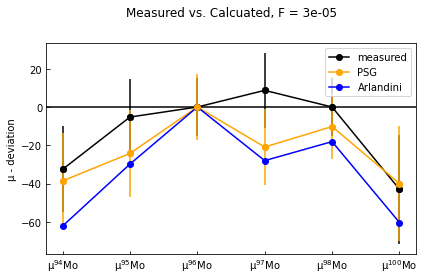

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Manual y', y=1.1, pad=-14)
plt.plot(isotope, N_obs_mu, color = 'black', label = 'measured', marker = 'o')
plt.plot(isotope, N_calc_mu, color = 'orange', label = 'PSG', marker = 'o')
plt.plot(isotope, N_calc2_mu, color = 'blue', label = 'Arlandini', marker = 'o')

ax.errorbar(isotope, N_obs_mu, yerr= Er_N_obs, fmt='o', color = 'black')
ax.errorbar(isotope, N_calc_mu, yerr= Er_N_calc, fmt='o', color = 'orange')

# plt.xlabel('isotope')
plt.ylabel('\u03bc - deviation')
plt.title('Measured vs. Calcuated, F = ' + str(F))
plt.axhline(y = 0, color = 'black')
leg = plt.legend()
# plt.show()
plt.savefig("Mo.pdf",format='pdf')

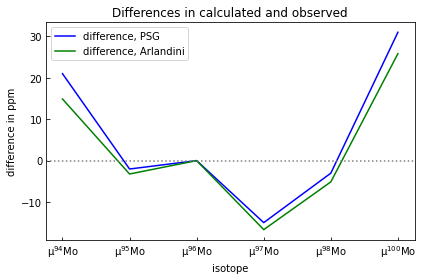

In [ ]:
# fig = plt.figure()
# ax = plt.axes() 
# ax.tick_params(axis="y",direction="in")
# ax.tick_params(axis="x",direction="in")

# plt.plot(isotope, N_mu_diff, color = 'blue', label = 'difference, PSG')
# plt.plot(isotope, N_mu_diff2, color = 'green', label = 'difference, Arlandini')
# plt.xlabel('isotope')
# plt.ylabel('difference in ppm')
# plt.title('Differences in calculated and observed')
# plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
# leg = plt.legend()
# plt.show()

**Plot (Difference from using Atomic Abundances and Mass Fractions)**
---

Here we compute and plot the ppm differnces between the observed and calculated values when using mass fractions versus when converting to atomic abudnances

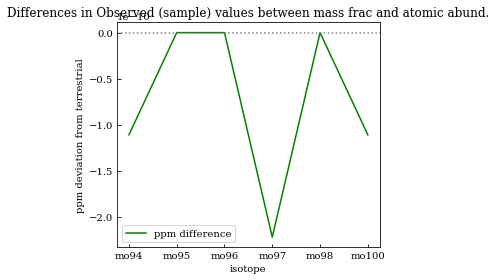

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

AM_obs_diff = []
for i in range(len(obs_mu_terr)):
  AM_obs_diff.append(N_obs_mu[i] - obs_mu_terr[i])

# print(AM_obs_diff)

AM_calc_diff = []
for i in range(len(N_calc_mu)):
  AM_calc_diff.append(N_calc_mu[i] - calc_mu_terr[i])
  
# print(AM_calc_diff)

# plt.plot(isotope, N_obs_mu, color = 'blue', label = 'atom abund (mu)')
# plt.plot(isotope, obs_mu_terr, color = 'black', label = 'mass frac (mu)')
plt.plot(isotope, AM_obs_diff, color = 'green', label = 'ppm difference')
plt.xlabel('isotope')
plt.ylabel('ppm deviation from terrestrial')
plt.title('Differences in Observed (sample) values between mass frac and atomic abund.')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()

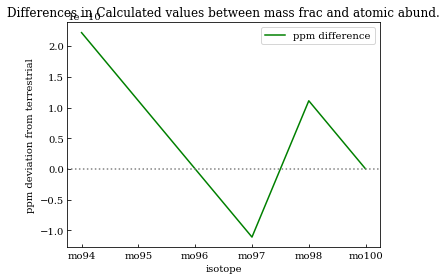

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

# plt.plot(isotope, N_obs_mu, color = 'blue', label = 'atom abund (mu)')
# plt.plot(isotope, obs_mu_terr, color = 'black', label = 'mass frac (mu)')
plt.plot(isotope, AM_calc_diff, color = 'green', label = 'ppm difference')
plt.xlabel('isotope')
plt.ylabel('ppm deviation from terrestrial')
plt.title('Differences in Calculated values between mass frac and atomic abund.')
plt.axhline(y = 0, color = 'gray', linestyle = 'dotted')
leg = plt.legend()
plt.show()